In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'delay_sensitivity'
varied_param_legend_label = 'Delay Sensitivity'
varied_param_x_label = 'Delay Sensitivity'

In [4]:
num_influencers = 1
num_agents = 50

varied_param_values = list(np.linspace(0, 2, 11))

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 0.75, 2),
    consumer_attention_bound=30,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=None,
    influencer_attention_bound=60,
    influencer_delay_sensitivity=None,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=False,
    delay_sensitivity=varied_param_values,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing consumer 15
Optimizing consumer 16
Optimizing consumer 17
Optimizing consumer 18
Optimizing consumer 19
Optimizing consumer 20
Optimizing consumer 21
Optimizing consumer 22
Optimizing consumer 23
Optimizing consumer 24
Optimizing consumer 25
Optimizing consumer 26
Optimizing consumer 27
Optimizing consumer 28
Optimizing consumer 29
Optimizing consumer 30
Optimizing consumer 31
Optimizing consumer 32
Optimizing consumer 33
Optimizing consumer 34
Optimizing consumer 35
Optimizing consumer 36
Optimizing consumer 37
Optimizing consumer 38
Optimizing consumer 39
Optimizing consumer 40
Optimizing consumer 41
Optimizing consumer 42
Optimizing consumer 4

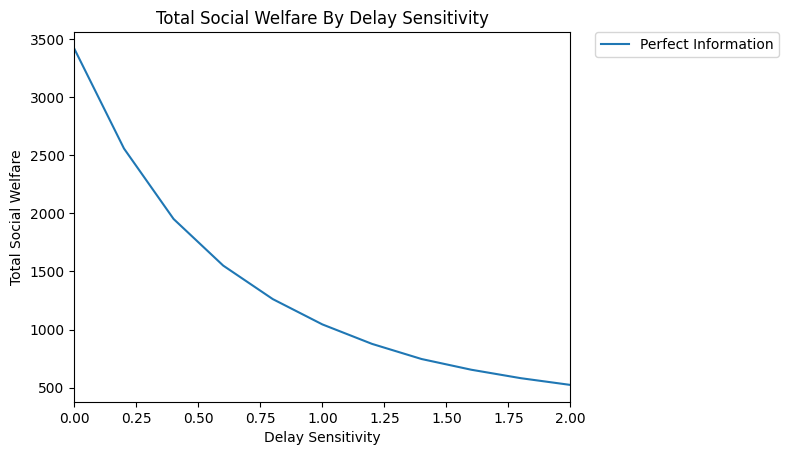

In [6]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

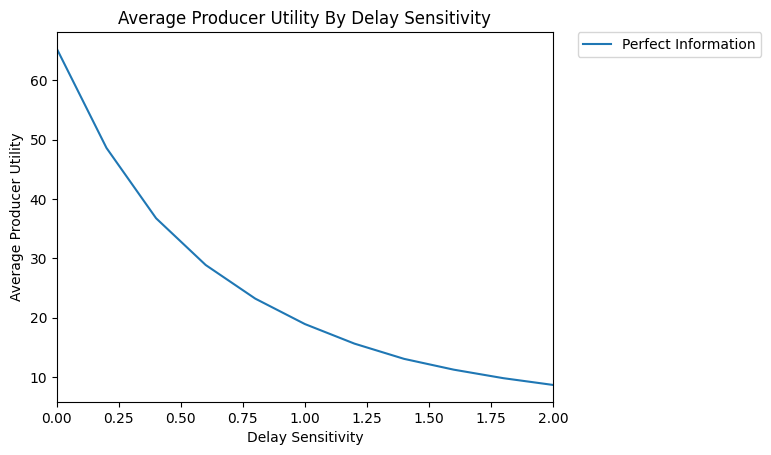

In [7]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

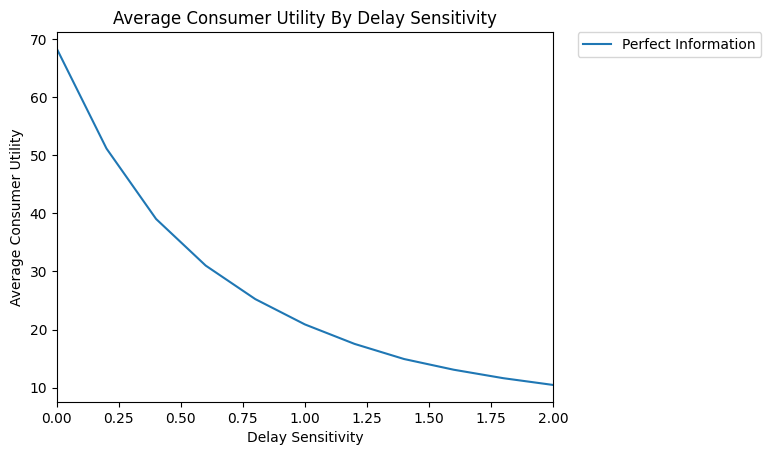

In [8]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

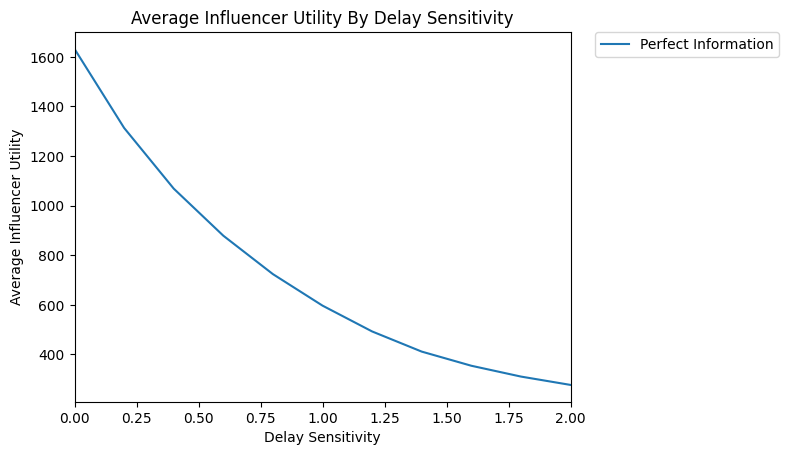

In [9]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

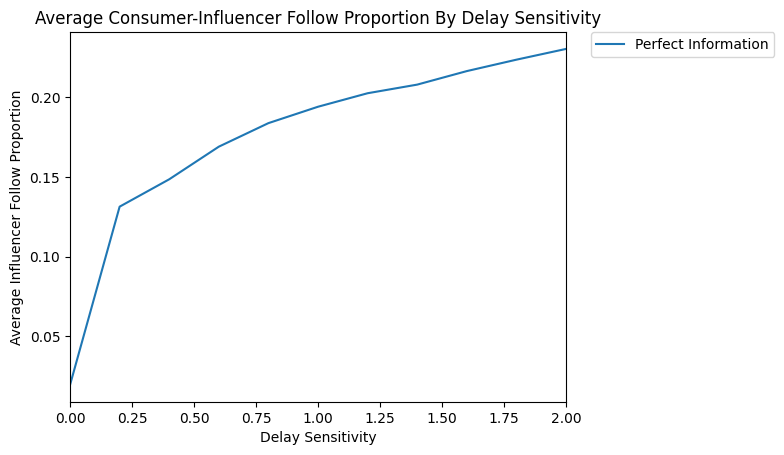

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

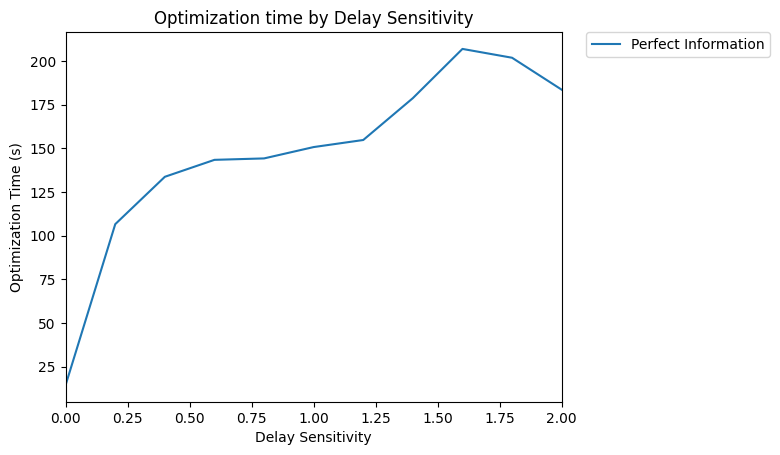

In [11]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

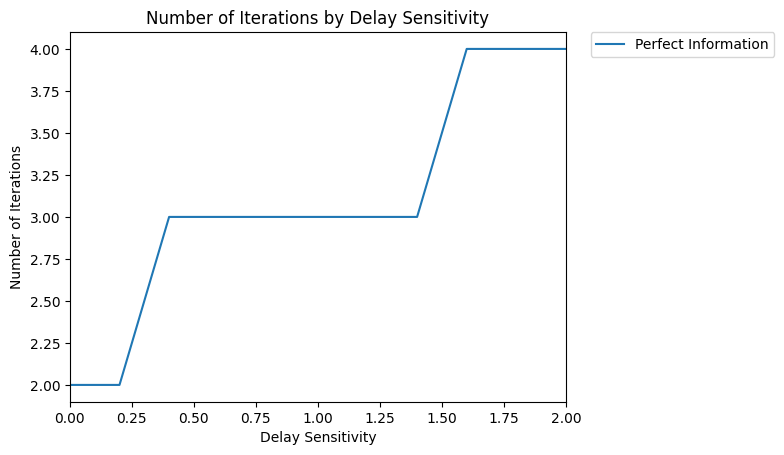

In [12]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

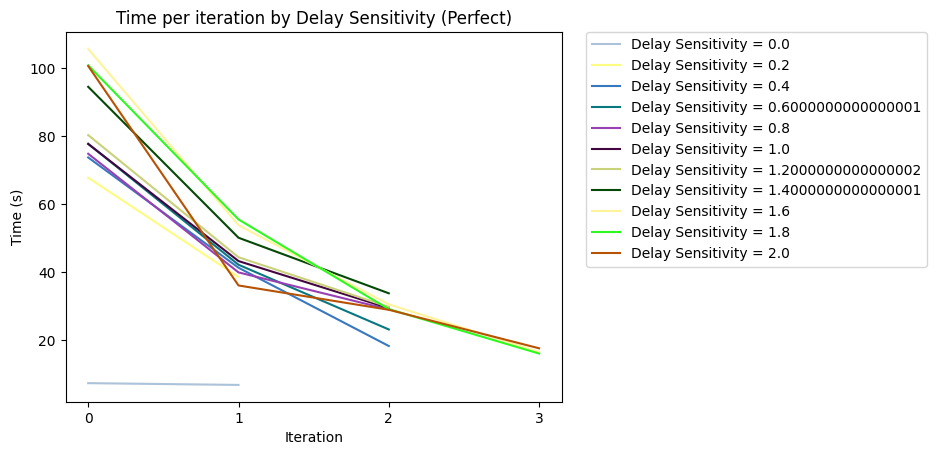

In [13]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

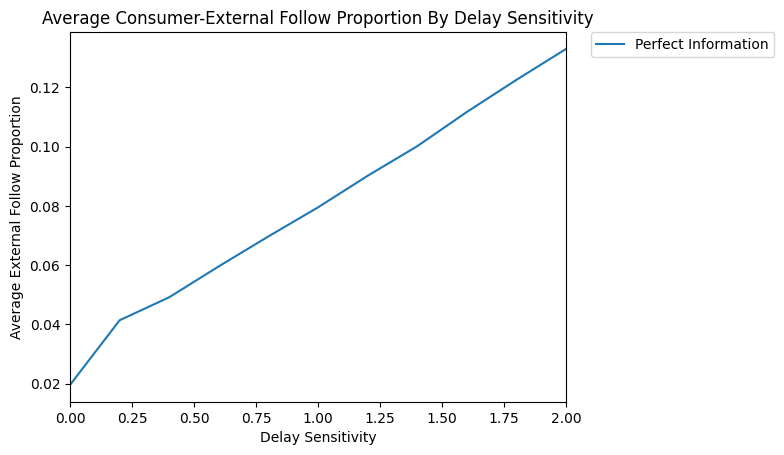

In [14]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

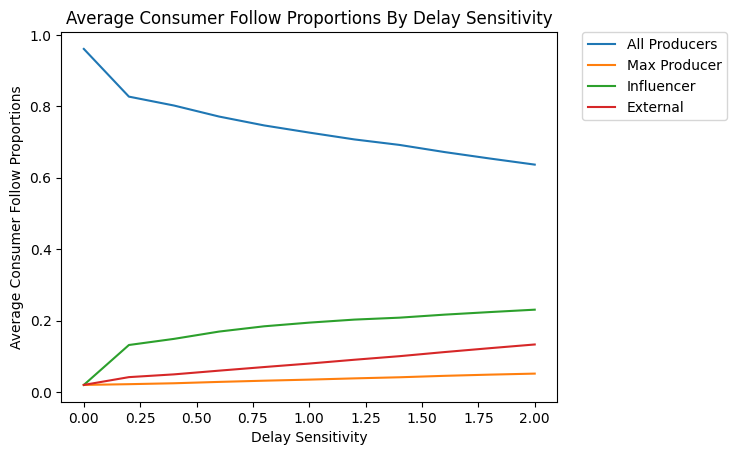

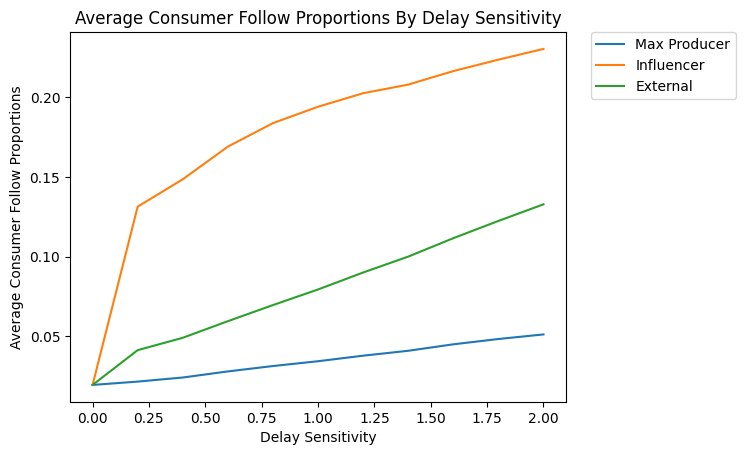

In [15]:
avg_producer_proportions = []
avg_max_producer_proportions = []
avg_influencer_proportions = []
avg_external_proportions = []
for i in range(len(varied_param_values)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_producer_proportion = 0
    avg_max_producer_proportion = 0
    avg_influencer_proportion = 0
    avg_external_proportion = 0
    for consumer in perfect_stat.consumer_stats.values():
        avg_producer_proportion += sum(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_max_producer_proportion += np.max(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_influencer_proportion += consumer.following_rates[-1][-2] / consumer.agent.attention_bound
        avg_external_proportion += consumer.following_rates[-1][-1] / consumer.agent.attention_bound
    avg_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_max_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_influencer_proportion /= len(perfect_stat.consumer_stats)
    avg_external_proportion /= len(perfect_stat.consumer_stats)

    avg_producer_proportions.append(avg_producer_proportion)
    avg_max_producer_proportions.append(avg_max_producer_proportion)
    avg_influencer_proportions.append(avg_influencer_proportion)
    avg_external_proportions.append(avg_external_proportion)
plt.figure()
plt.title(f'Average Consumer Follow Proportions By {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average Consumer Follow Proportions')
plt.plot(varied_param_values, avg_producer_proportions, label='All Producers')
plt.plot(varied_param_values, avg_max_producer_proportions, label='Max Producer')
plt.plot(varied_param_values, avg_influencer_proportions, label='Influencer')
plt.plot(varied_param_values, avg_external_proportions, label='External')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

plt.figure()
plt.title(f'Average Consumer Follow Proportions By {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average Consumer Follow Proportions')
#plt.plot(varied_param_values, avg_producer_proportions, label='All Producers')
plt.plot(varied_param_values, avg_max_producer_proportions, label='Max Producer')
plt.plot(varied_param_values, avg_influencer_proportions, label='Influencer')
plt.plot(varied_param_values, avg_external_proportions, label='External')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

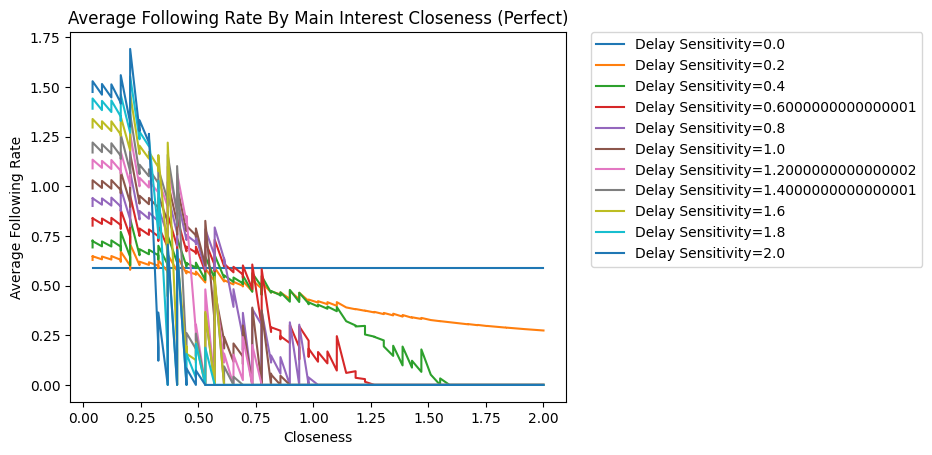

In [16]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = sorted(perfect_stat.average_following_rate_by_main_interest_closeness, key=lambda x: x[0])
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}")
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

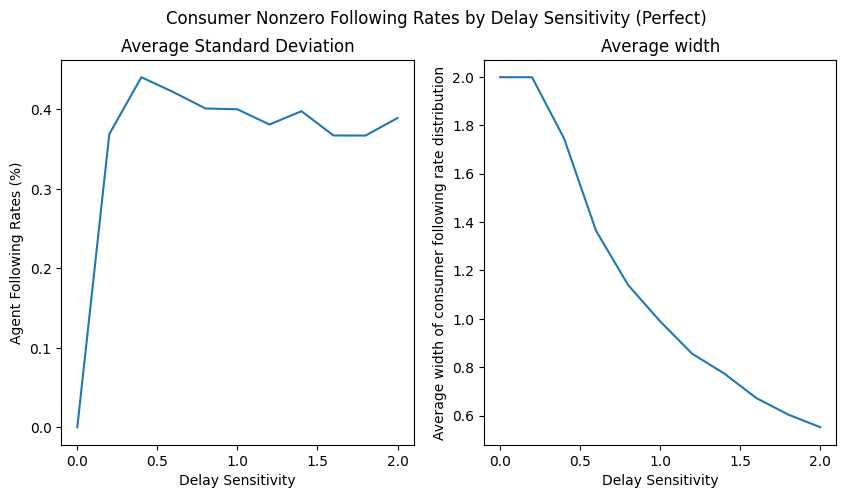

In [17]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Consumer Nonzero Following Rates by {varied_param_x_label} (Perfect)")

ax1.set_title(f'Average Standard Deviation')
ax1.set_xlabel(varied_param_x_label)
ax1.set_ylabel('Agent Following Rates (%)')
average_standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_standard_deviation = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x / stat.agent.attention_bound * 100 for x in stat.following_rates[-1][:-2] if x > 1e-3]
        if len(following_rate) == 0:
            continue
        avg_standard_deviation += np.std(following_rate)
    average_standard_deviations.append(avg_standard_deviation / len(perfect_stat.consumer_stats))
ax1.plot(varied_param_values, average_standard_deviations)

ax2.set_title(f'Average width')
ax2.set_xlabel(varied_param_x_label)
ax2.set_ylabel('Average width of consumer following rate distribution')
average_widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_width = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x for x in stat.following_rates[-1][:-2]]
        min_nonzero_index = 0
        max_nonzero_index = len(following_rate) - 1
        while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
            min_nonzero_index += 1
        while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
            max_nonzero_index -= 1
        if min_nonzero_index > max_nonzero_index:
            continue
        avg_width += np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    average_widths.append(avg_width / len(perfect_stat.consumer_stats))
ax2.plot(varied_param_values, average_widths)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

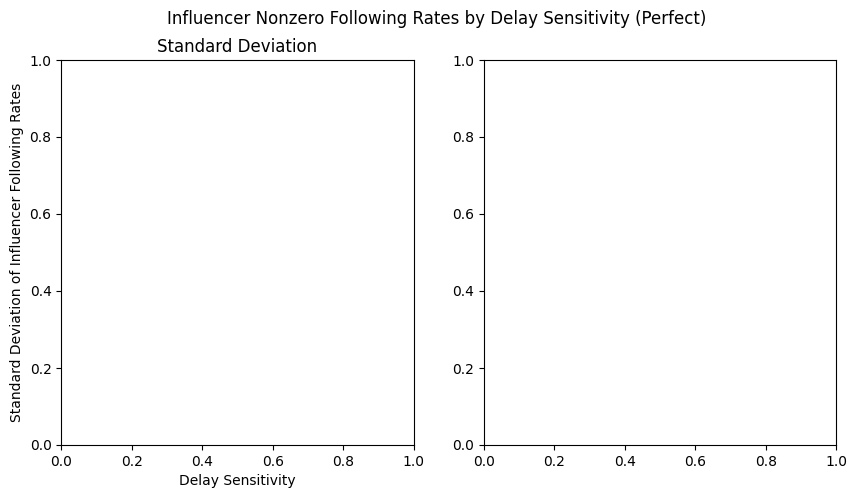

In [18]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Influencer Nonzero Following Rates by {varied_param_x_label} (Perfect)")

ax1.set_title(f'Standard Deviation')
ax1.set_xlabel(varied_param_x_label)
ax1.set_ylabel('Standard Deviation of Influencer Following Rates')
standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    influencer_stat = [x for x in perfect_stat.influencer_stats.values()][0]
    if influencer_stat.agent.attention_bound == 0:
        continue
    following_rate = [x / influencer_stat.agent.attention_bound * 100 for x in influencer_stat.following_rates[-1][:-2] if x > 1e-3]
    standard_deviations.append(np.std(following_rate))
ax1.plot(varied_param_values[1:], standard_deviations)

ax2.set_title(f'Width')
ax2.set_xlabel(varied_param_x_label)
ax2.set_ylabel('Width of Influencer following rate distribution')
widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    width = 0
    stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x for x in stat.following_rates[-1][:-2]]
    min_nonzero_index = 0
    max_nonzero_index = len(following_rate) - 1
    while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
        min_nonzero_index += 1
    while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
        max_nonzero_index -= 1
    if min_nonzero_index > max_nonzero_index:
        widths.append(0)
        continue
    width = np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    widths.append(width)
ax2.plot(varied_param_values, widths)

plt.show()

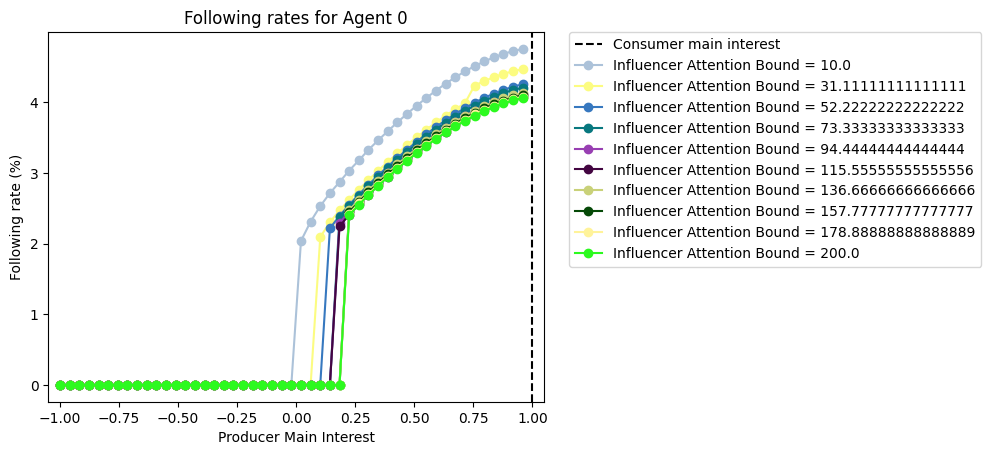

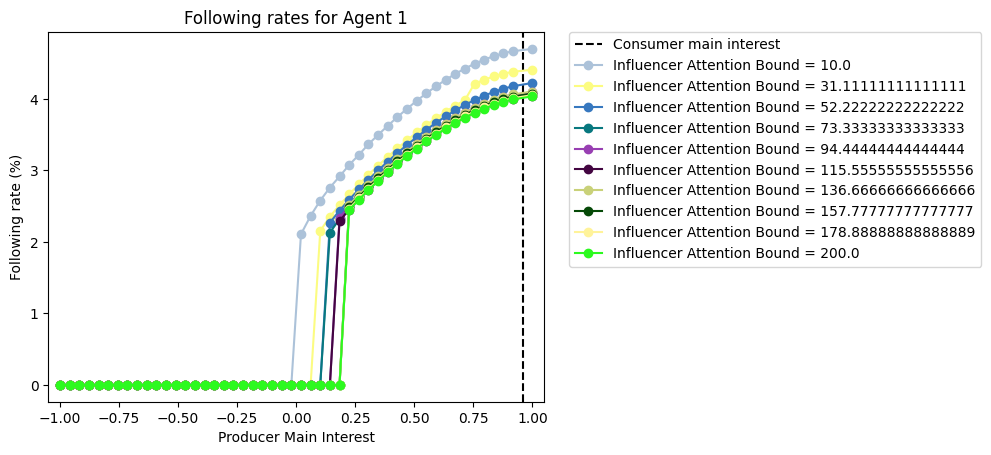

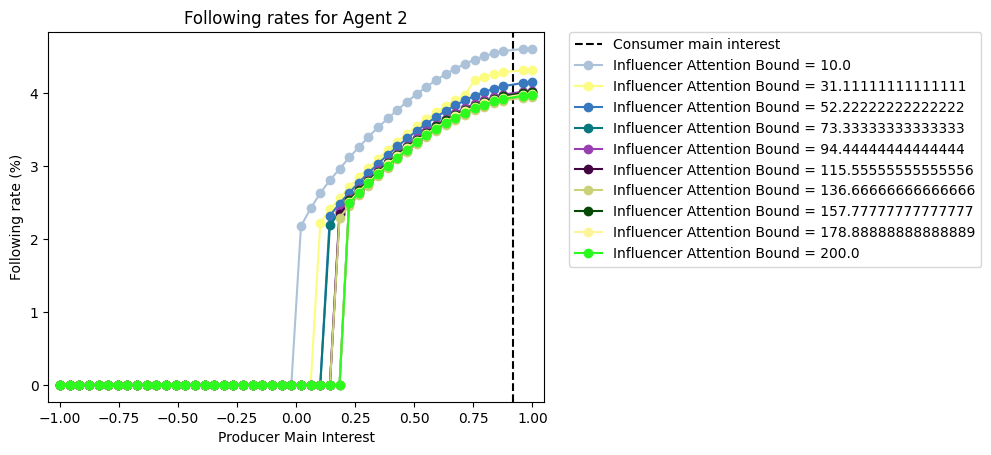

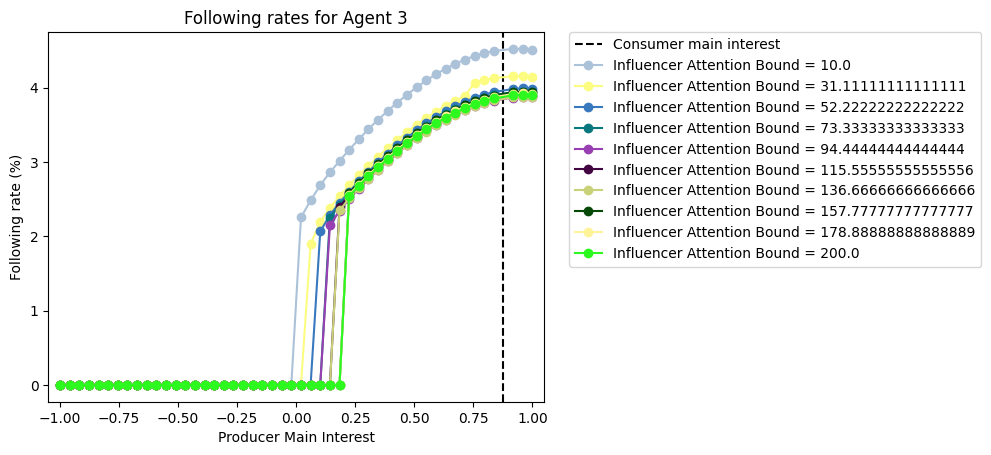

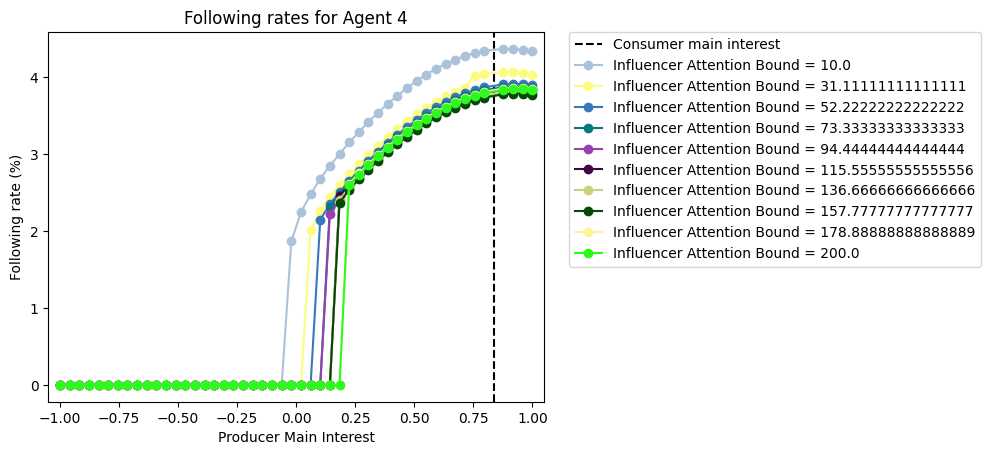

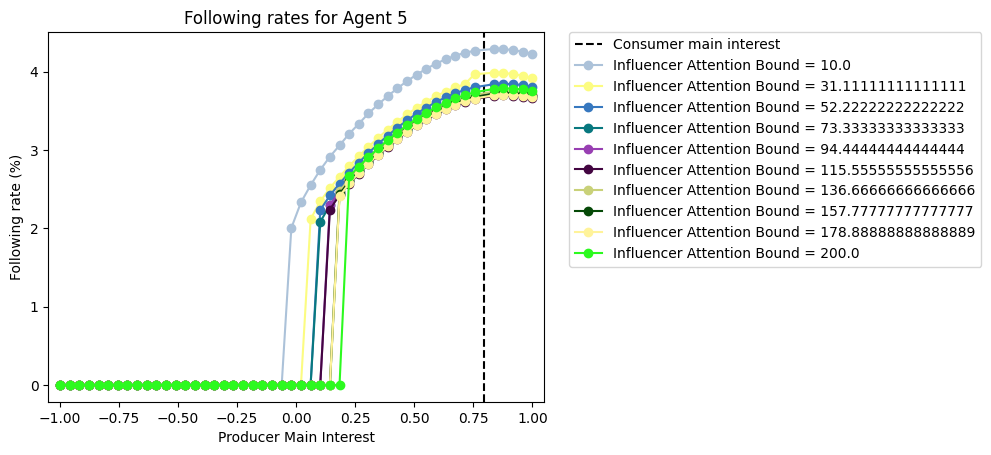

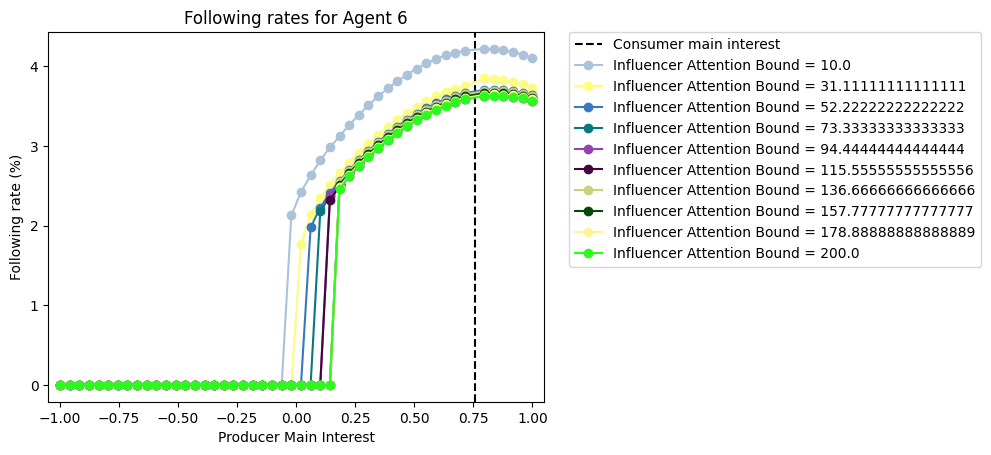

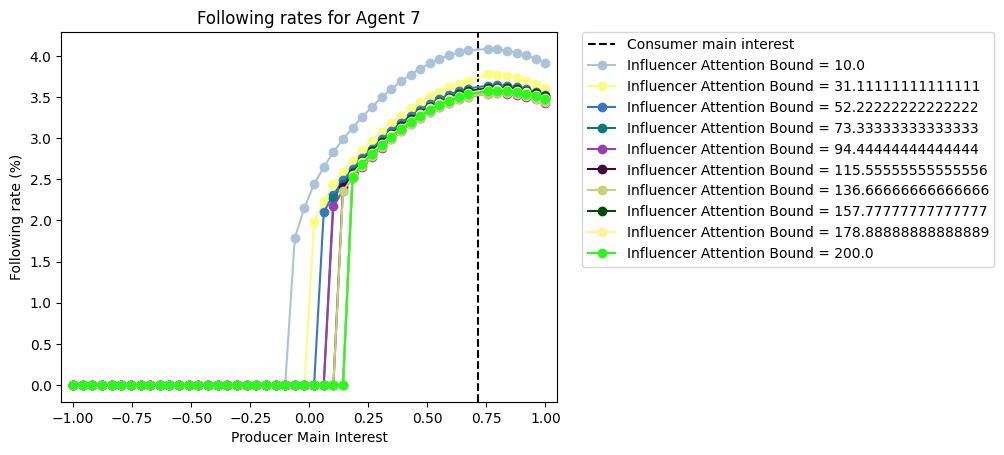

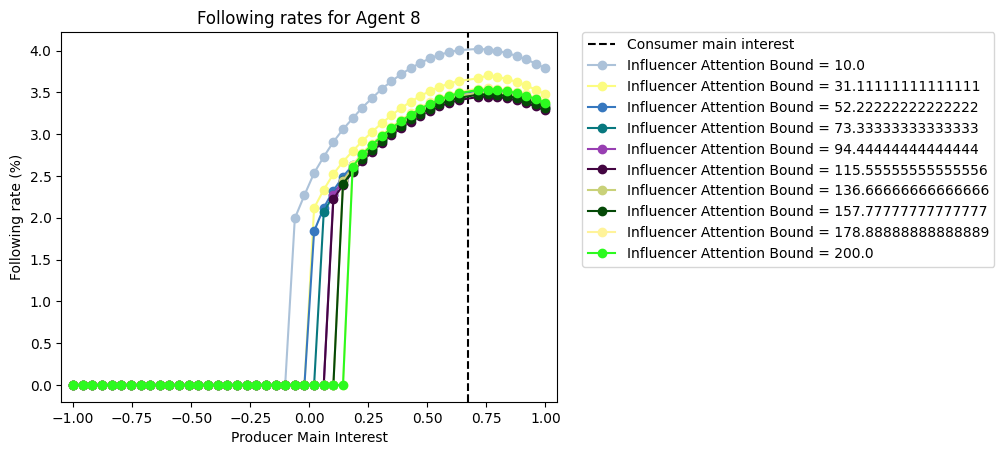

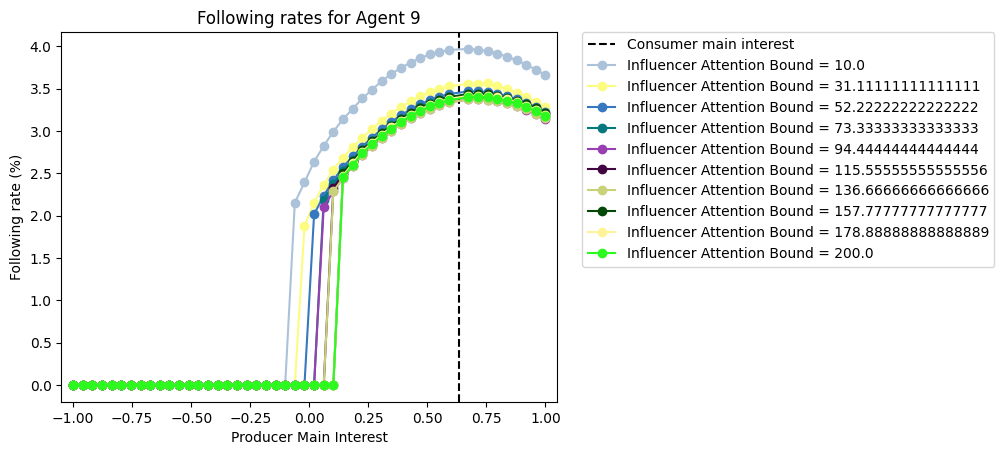

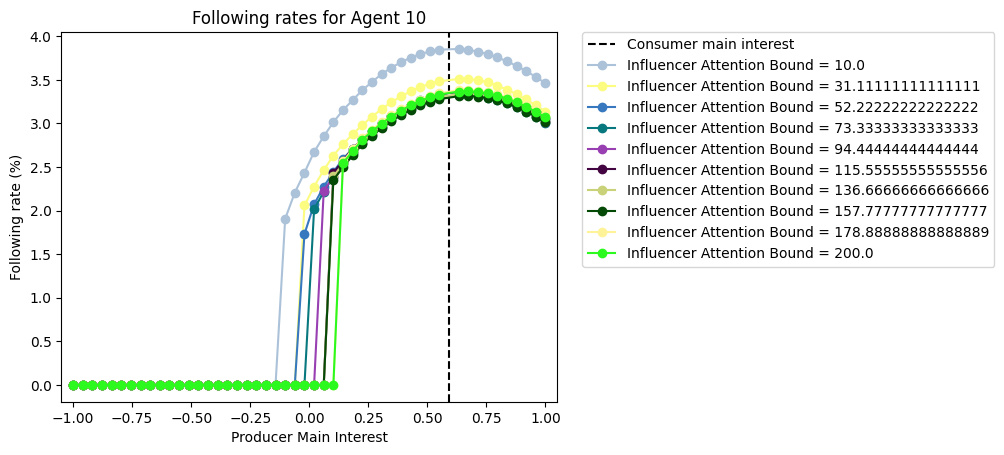

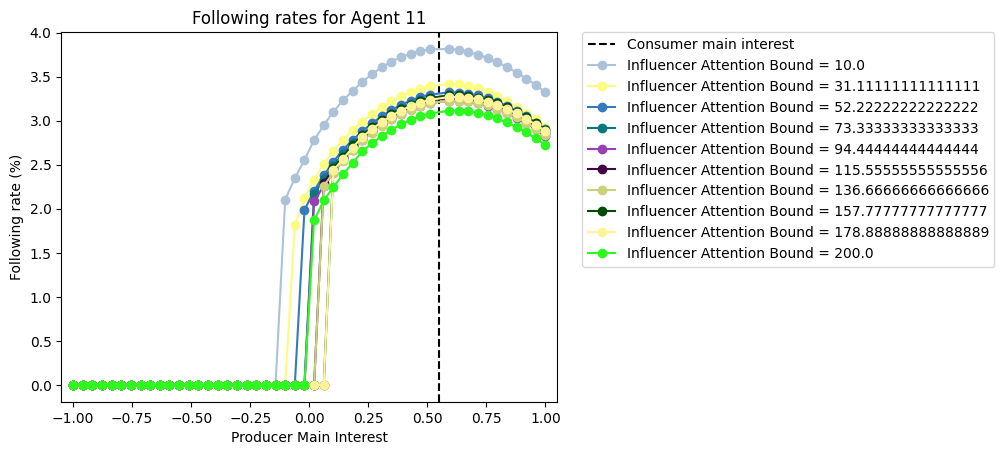

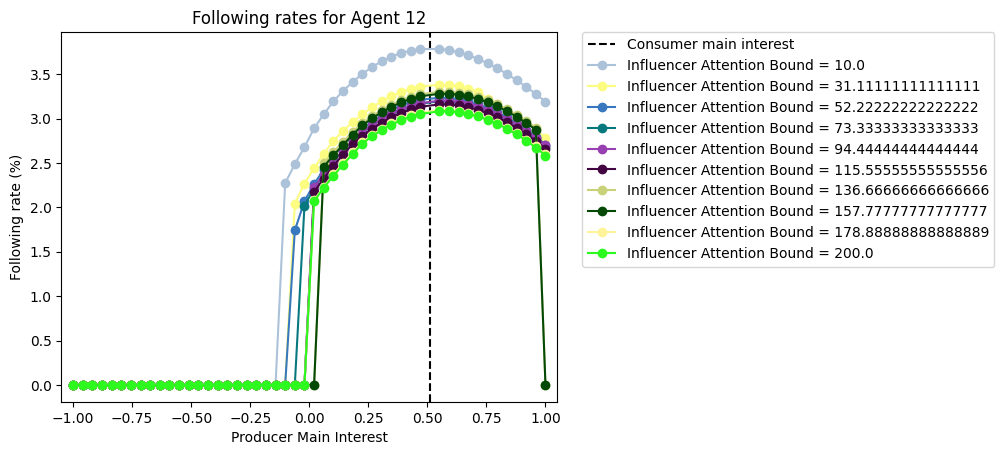

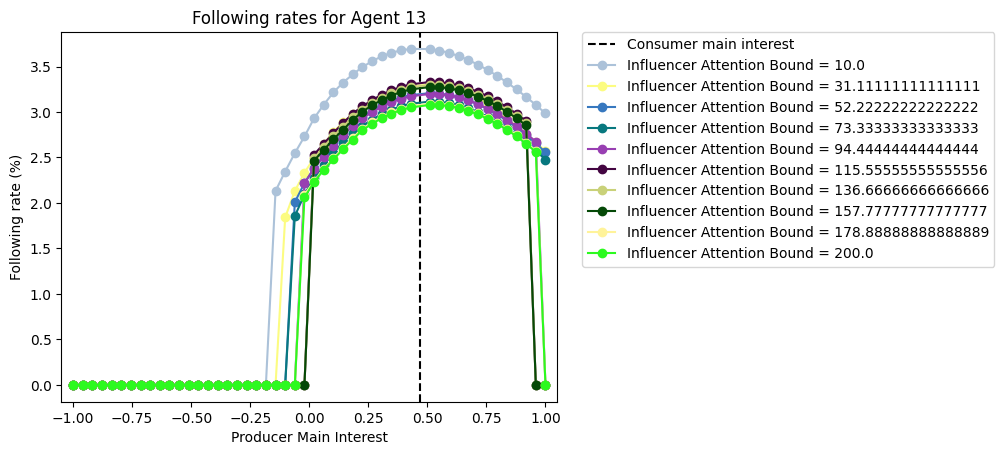

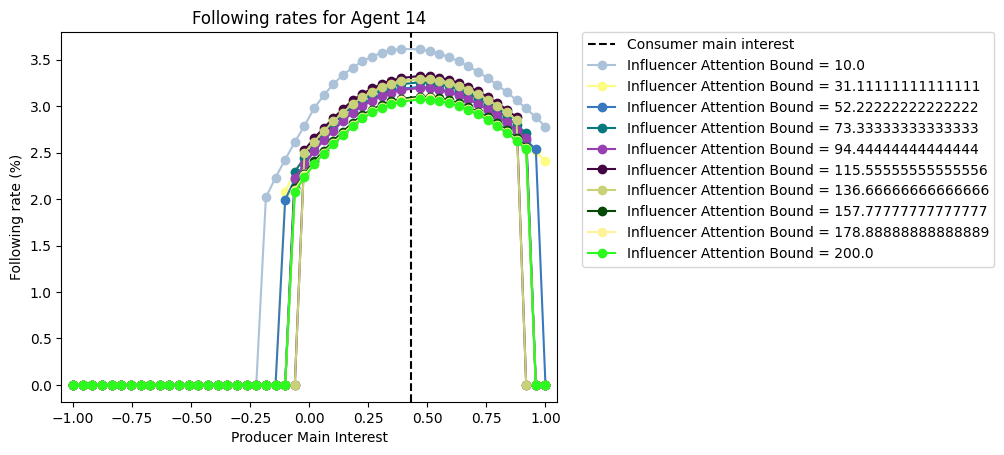

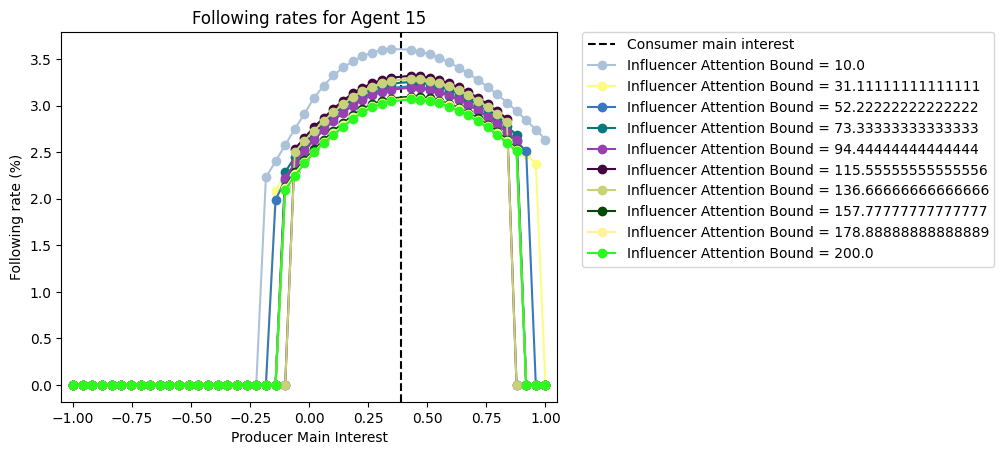

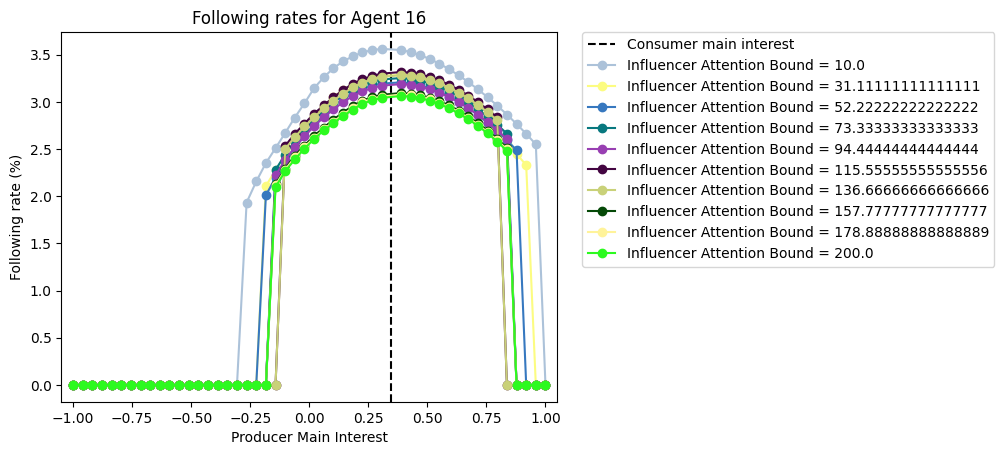

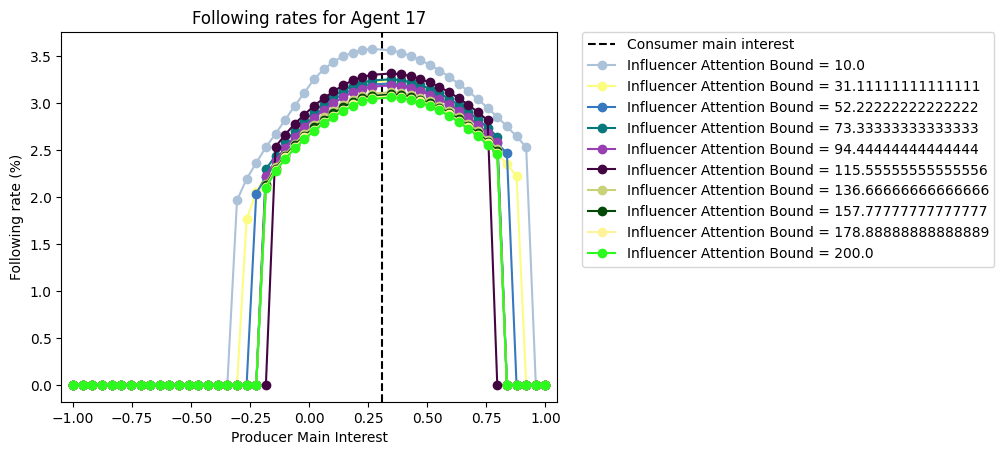

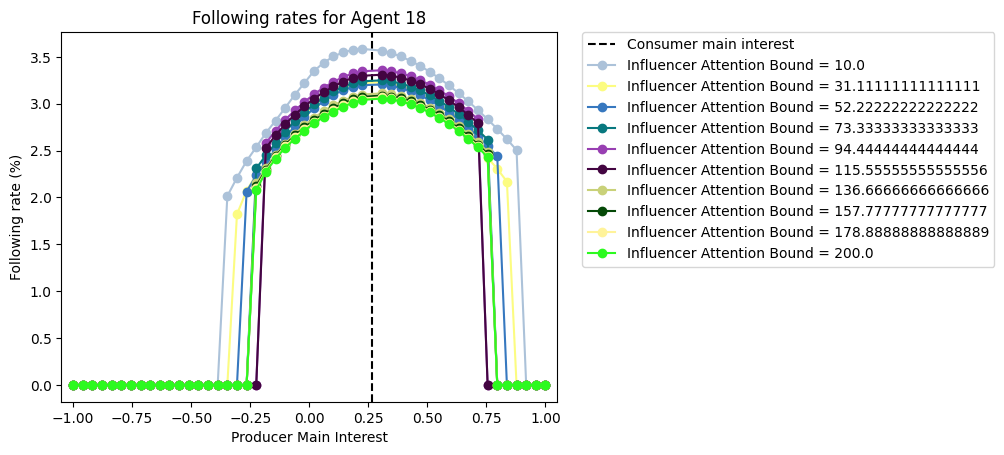

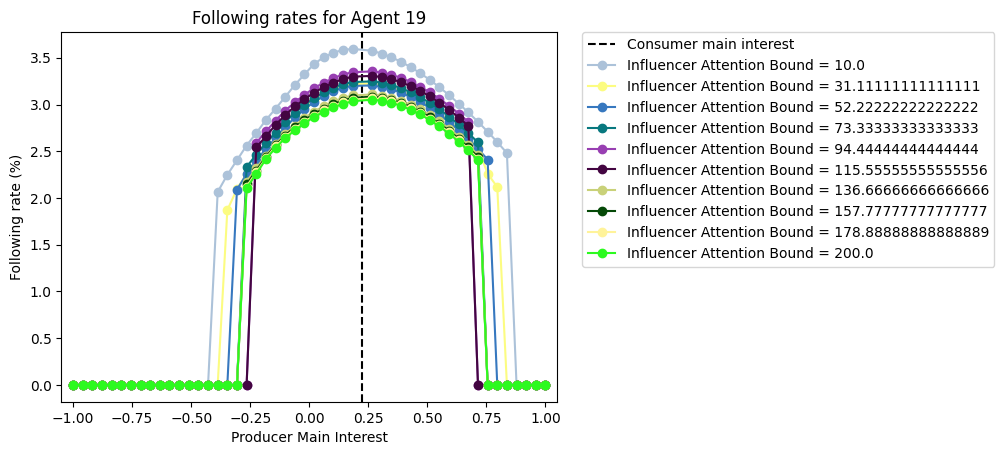

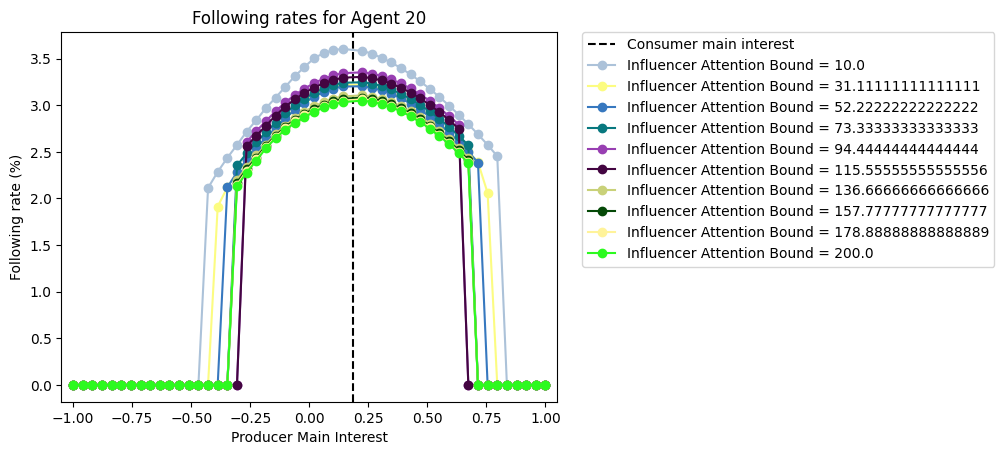

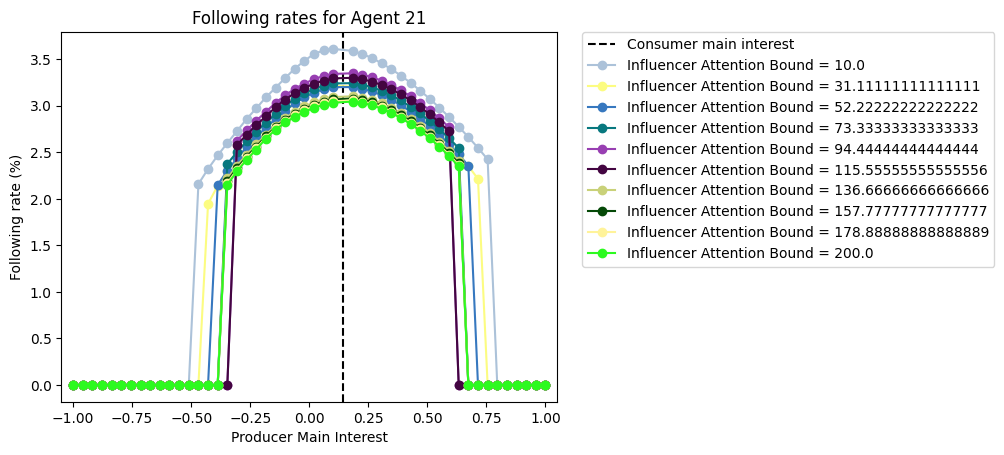

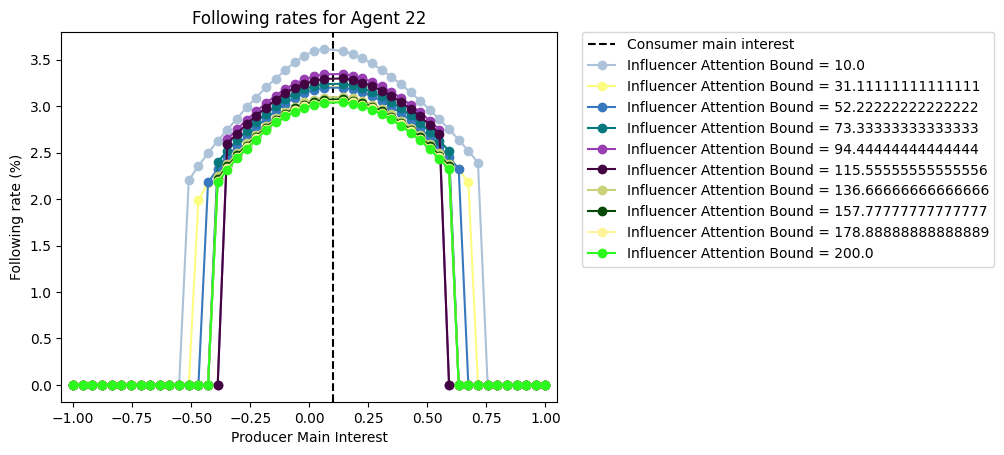

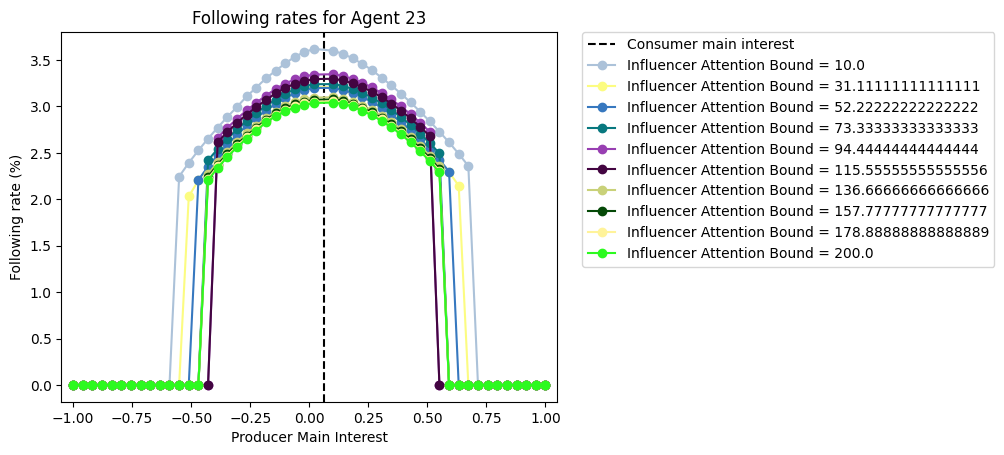

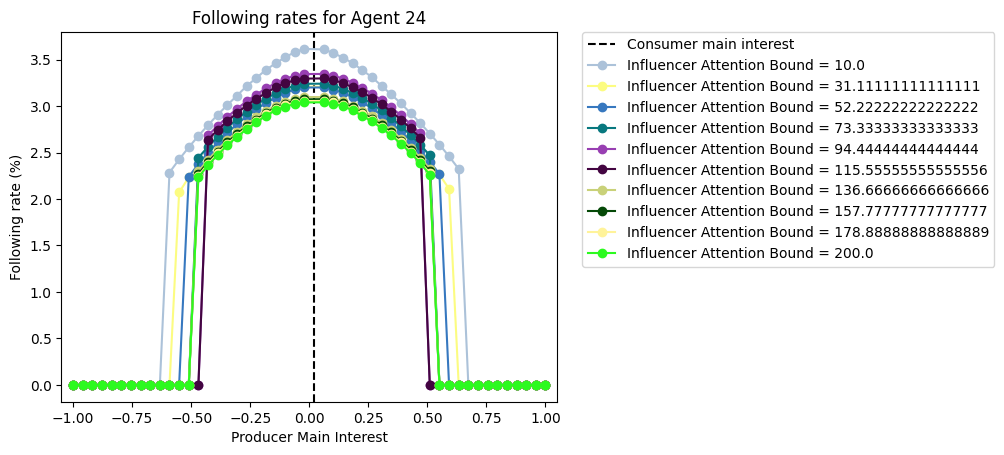

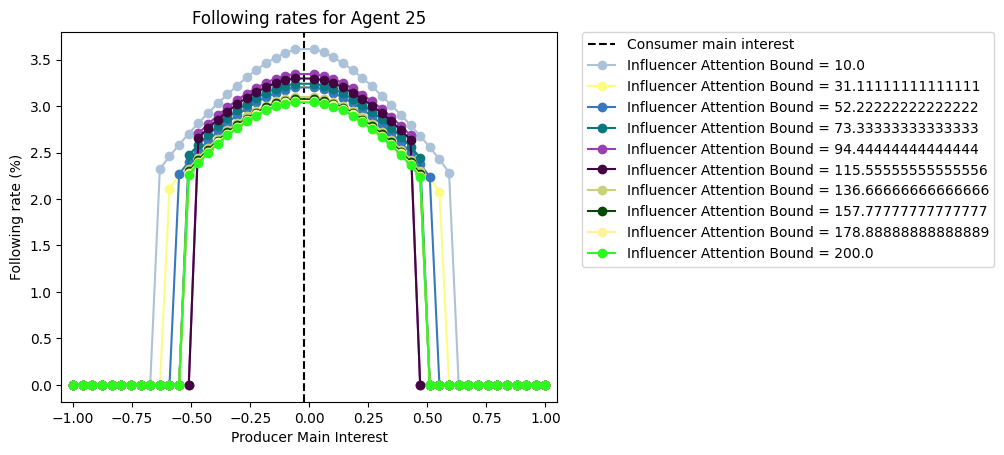

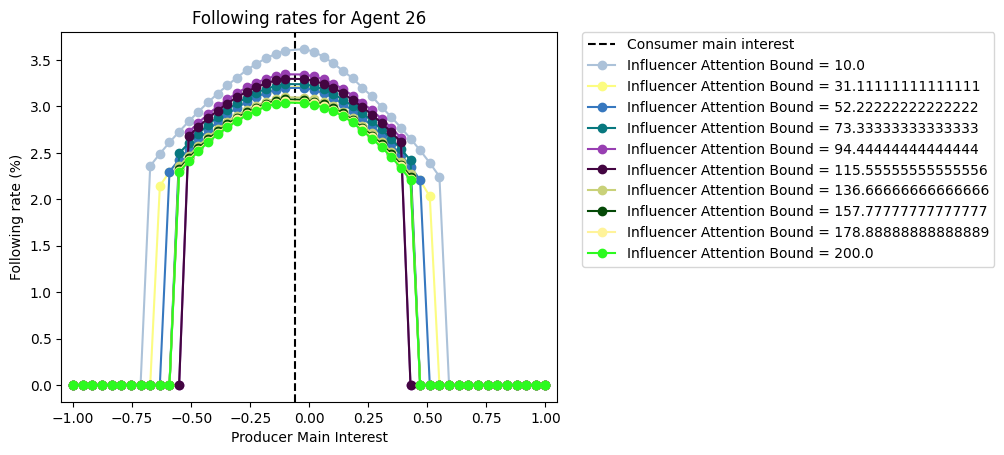

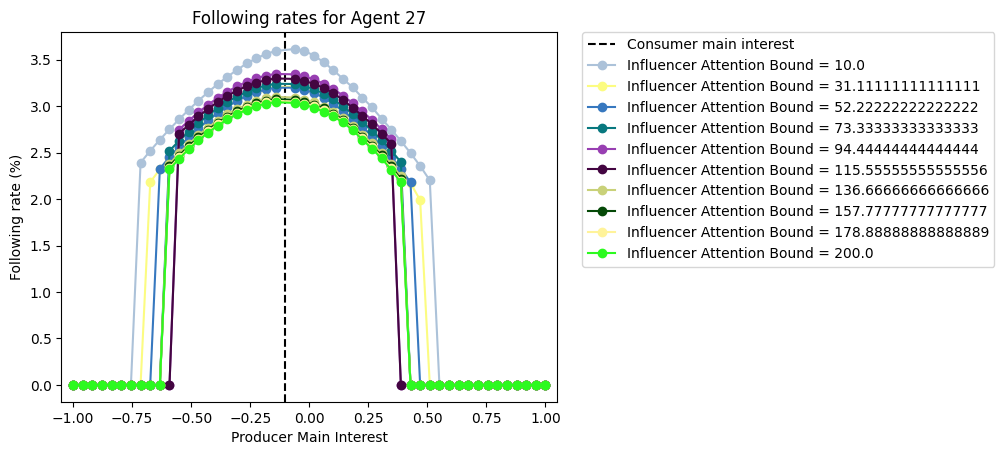

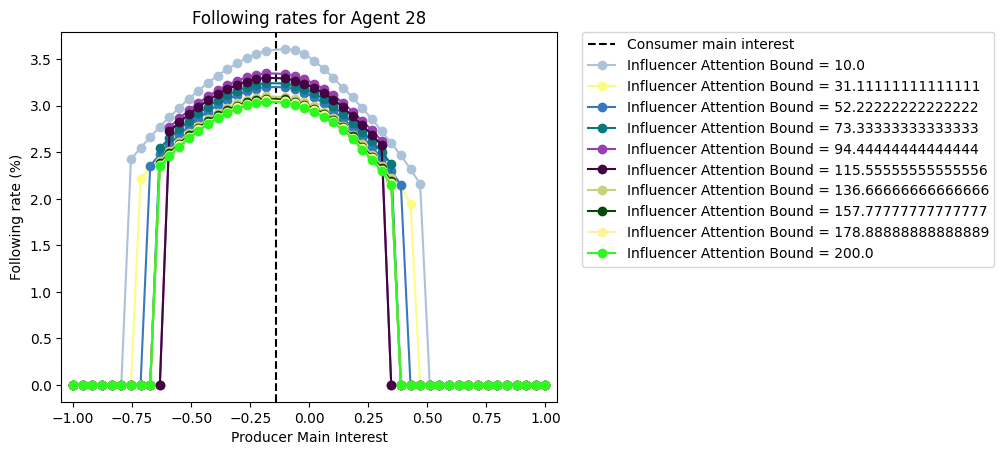

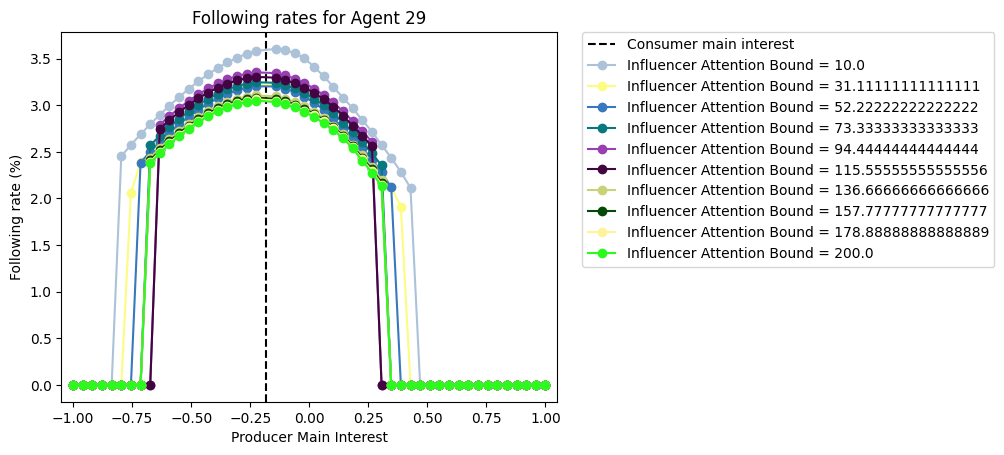

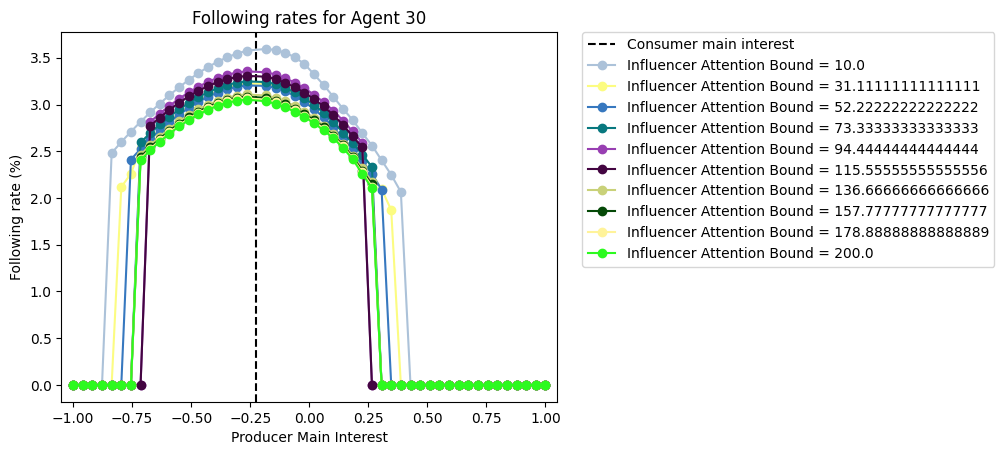

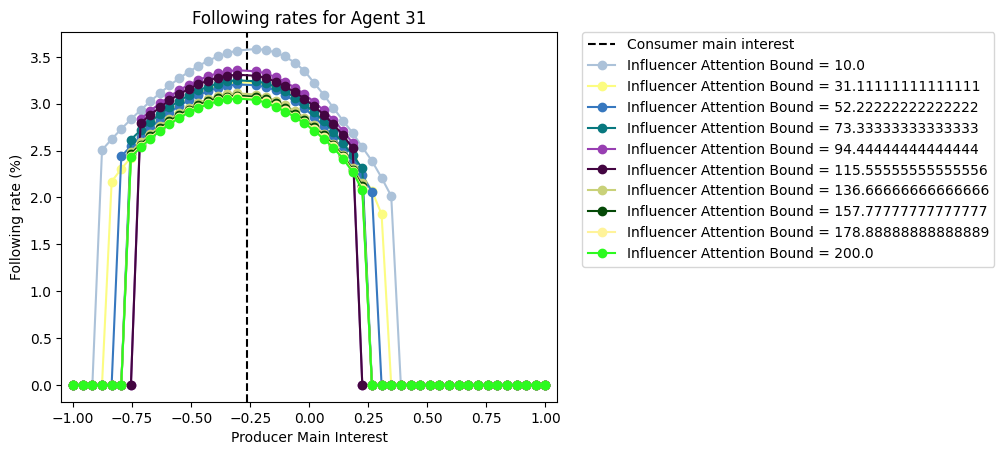

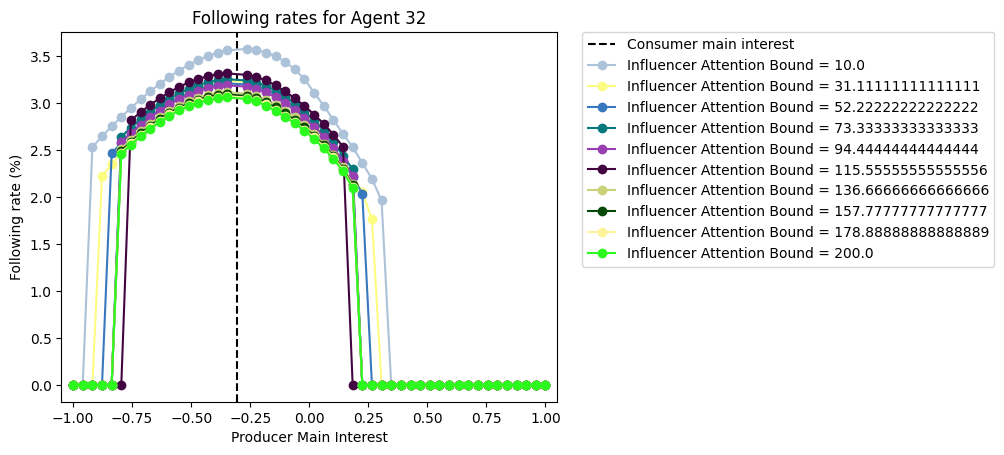

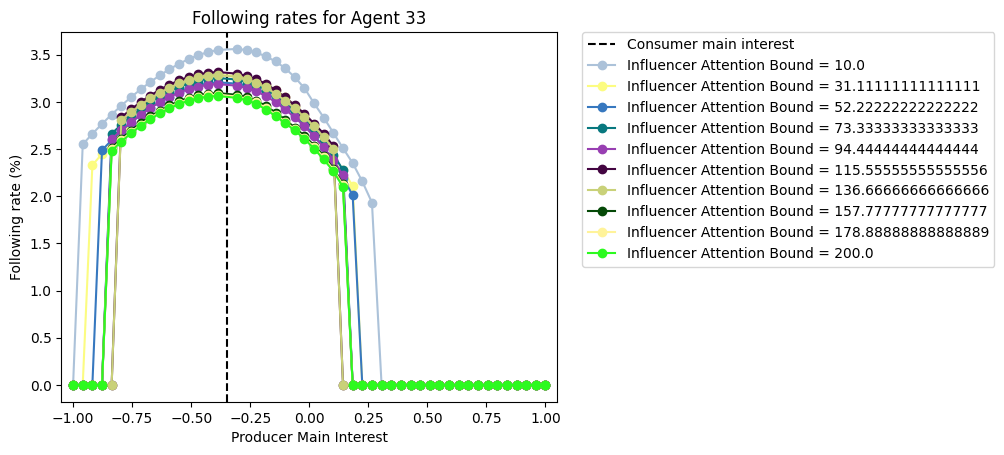

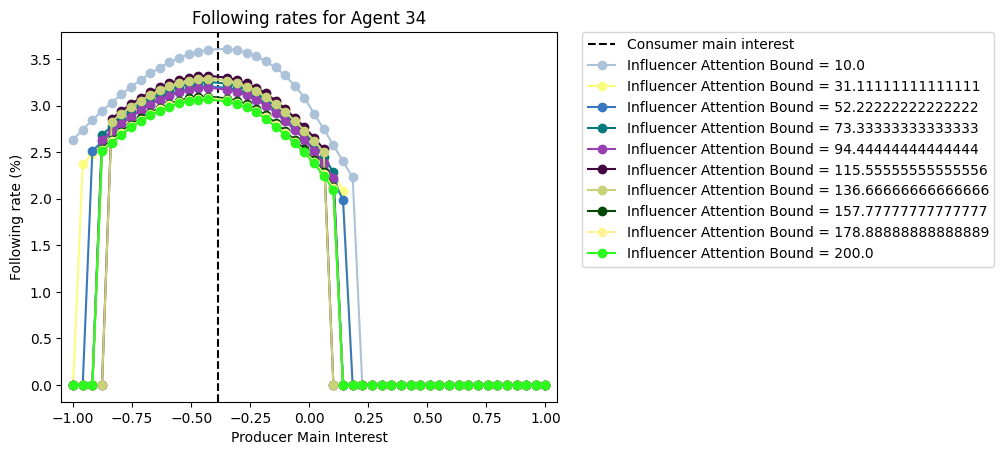

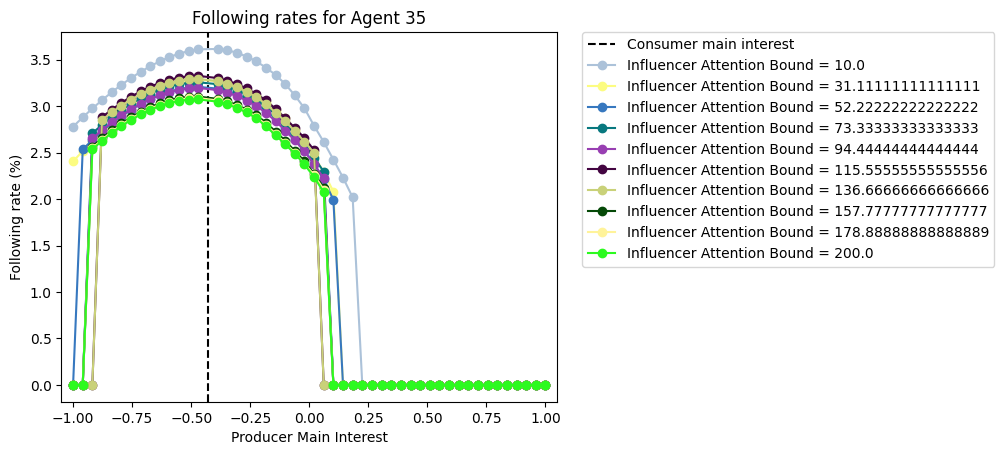

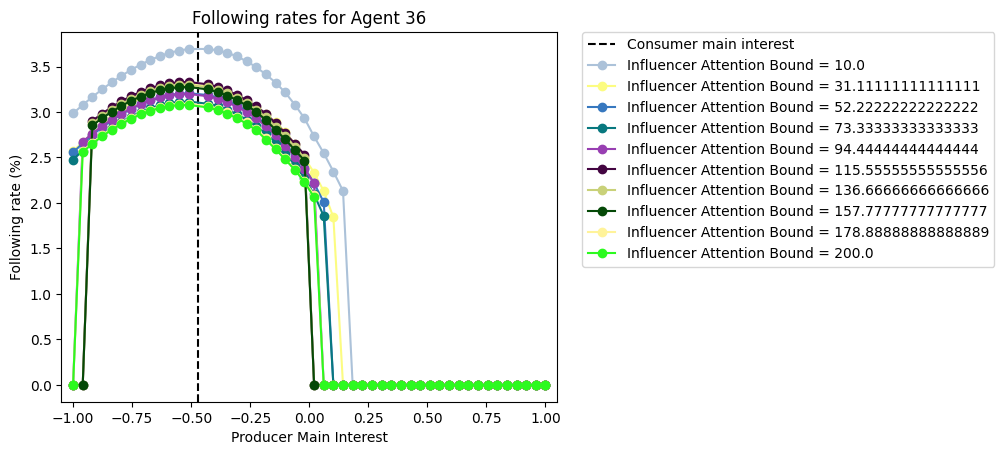

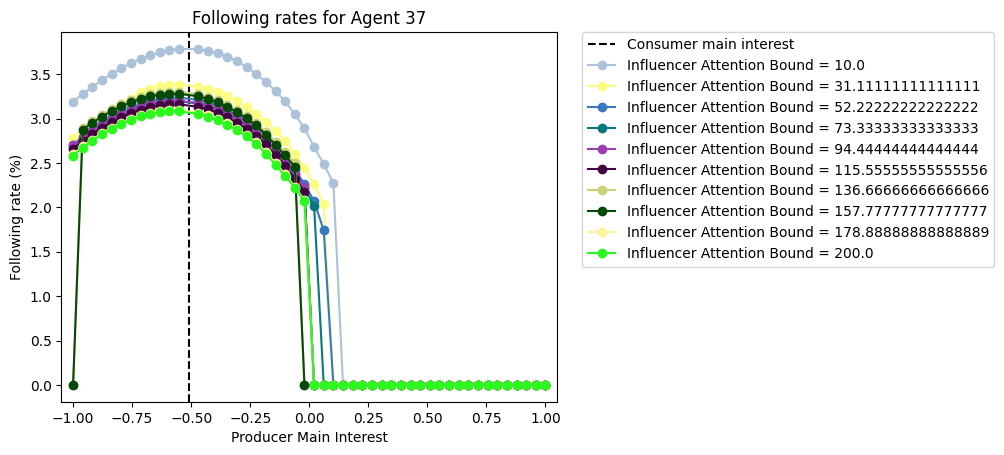

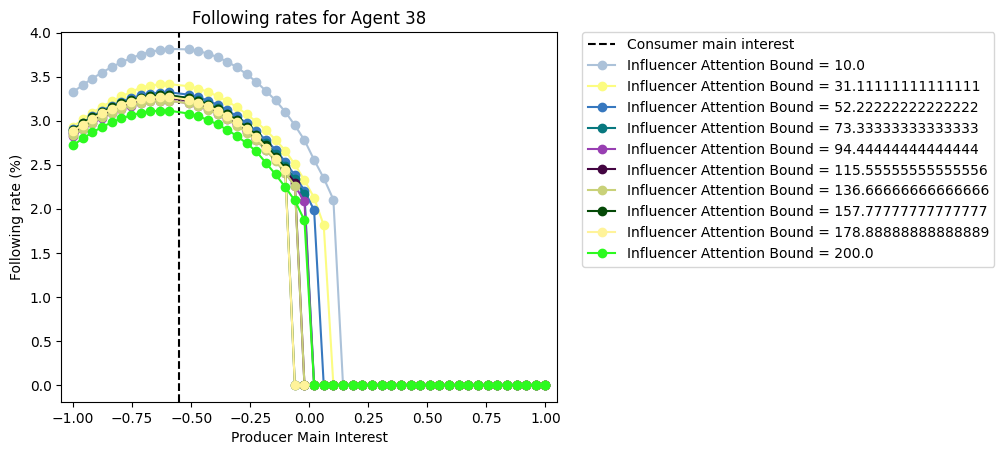

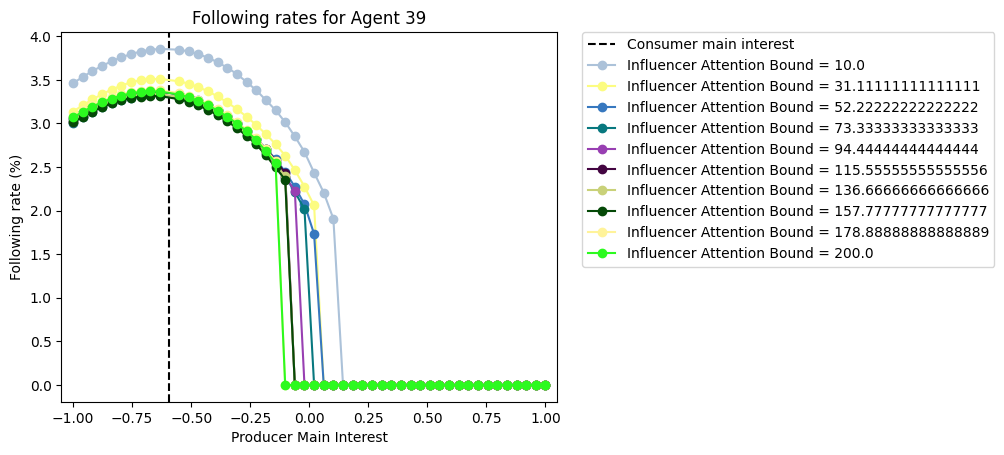

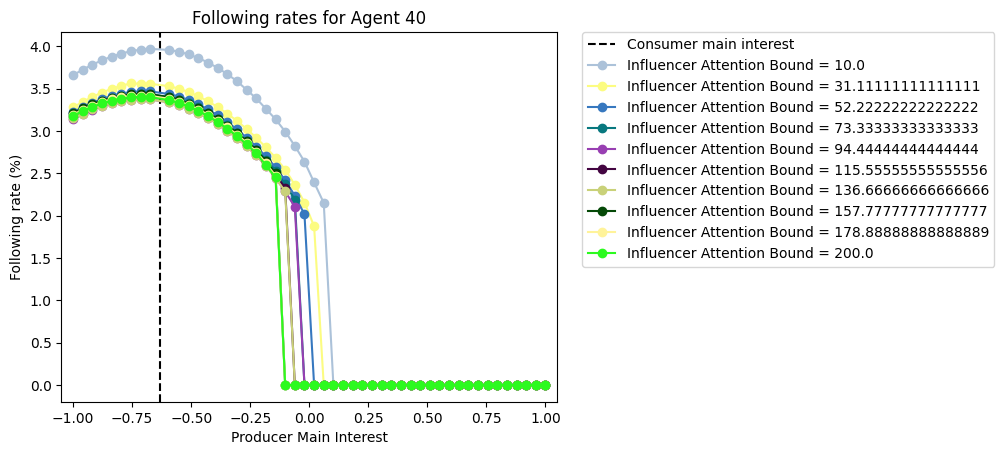

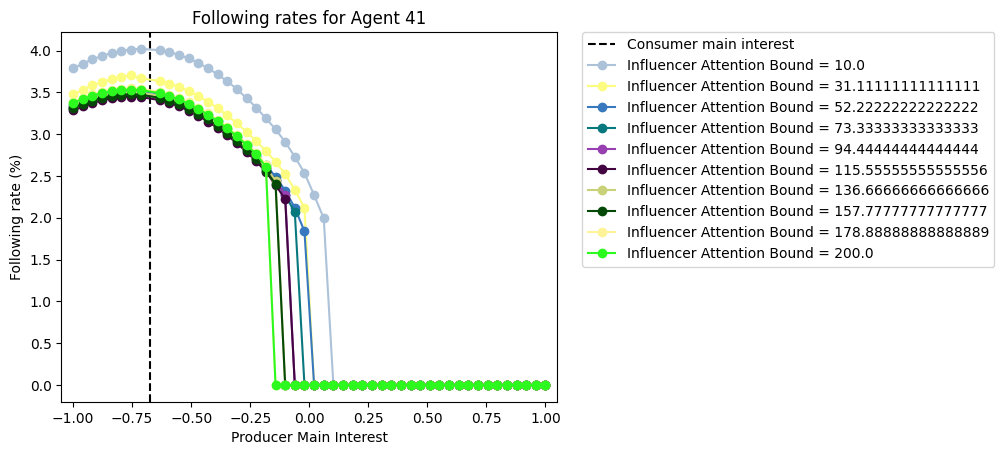

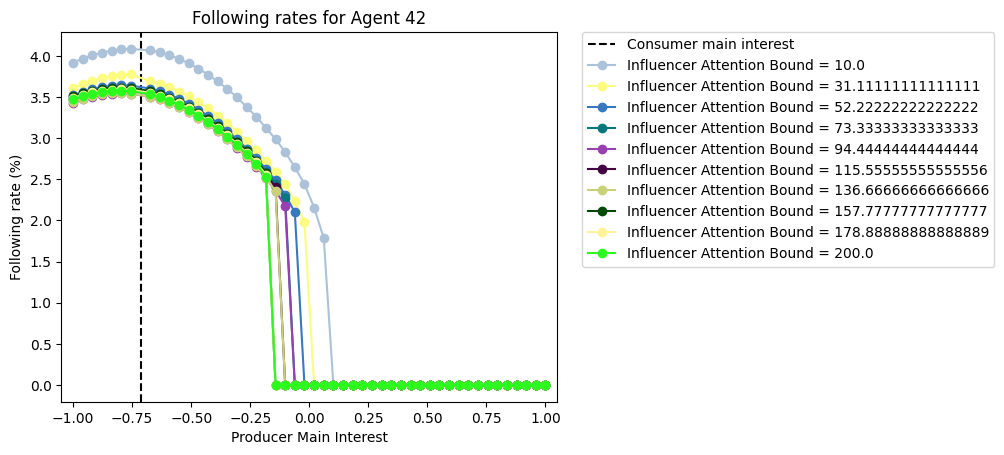

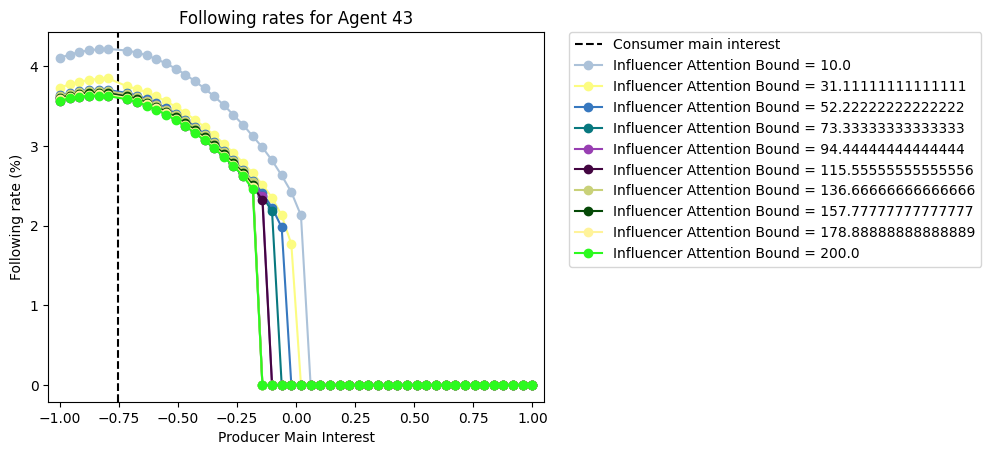

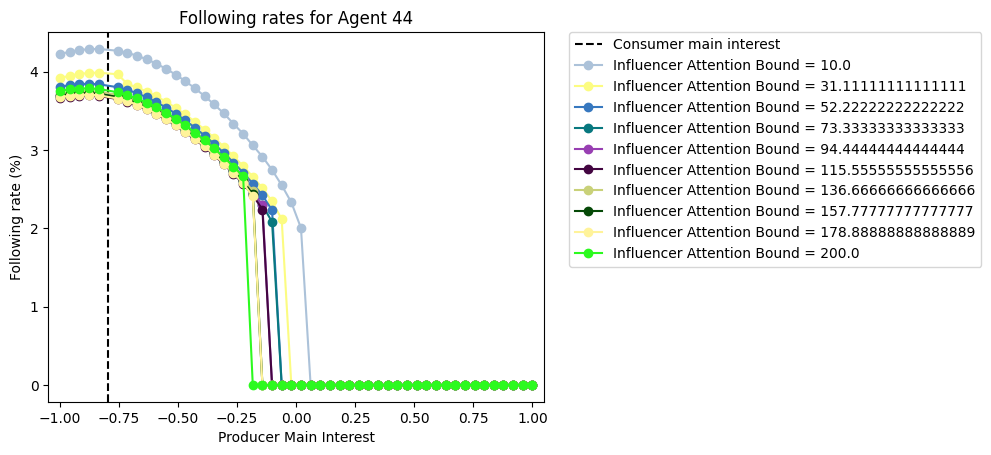

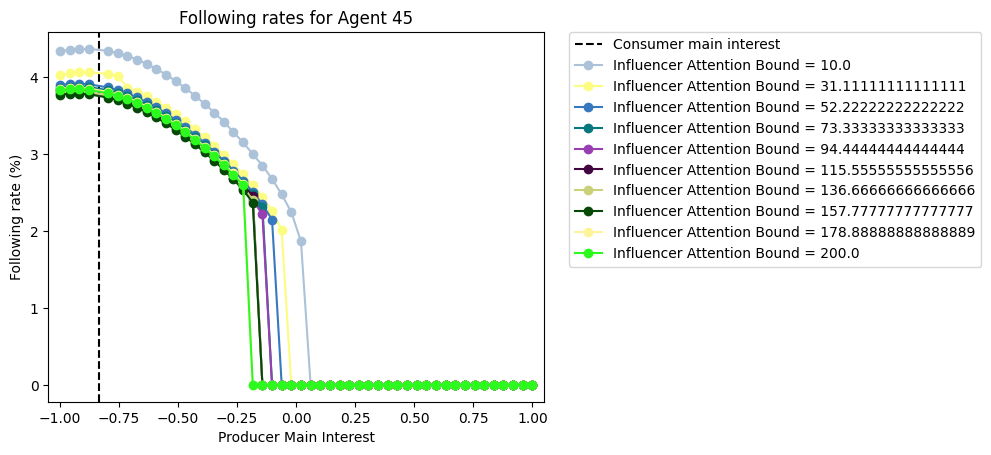

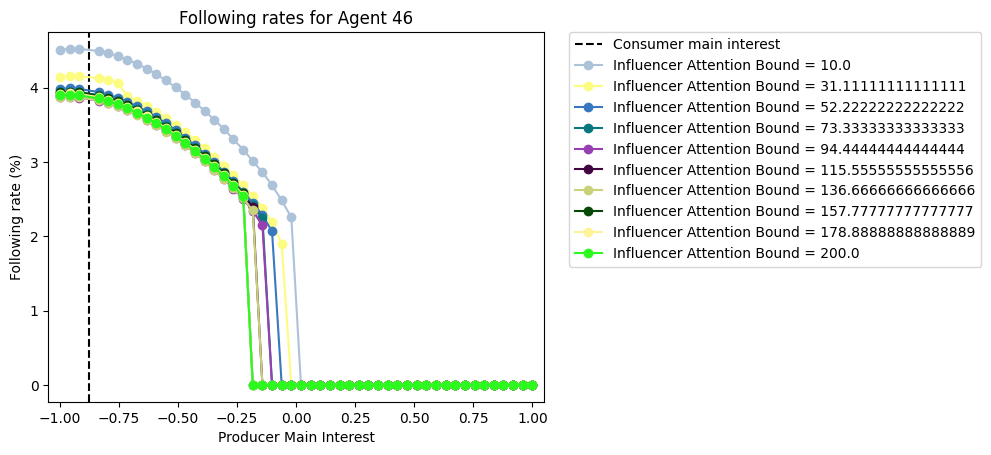

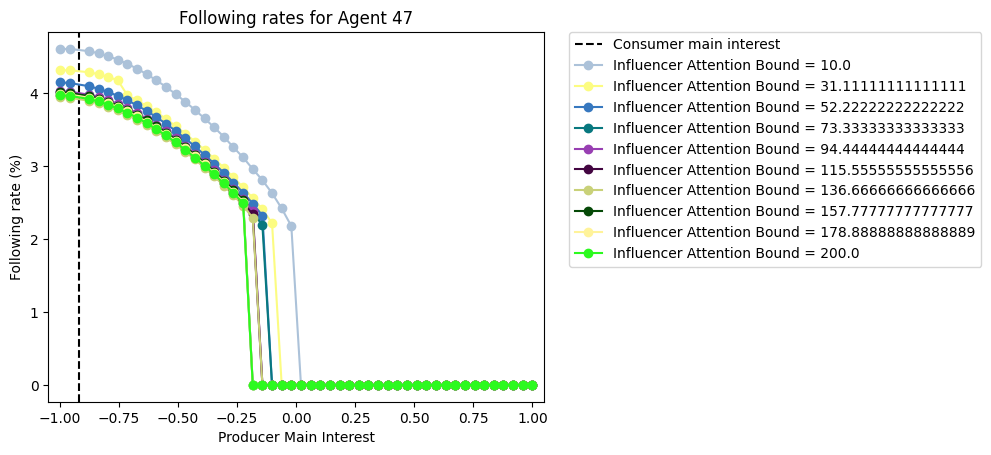

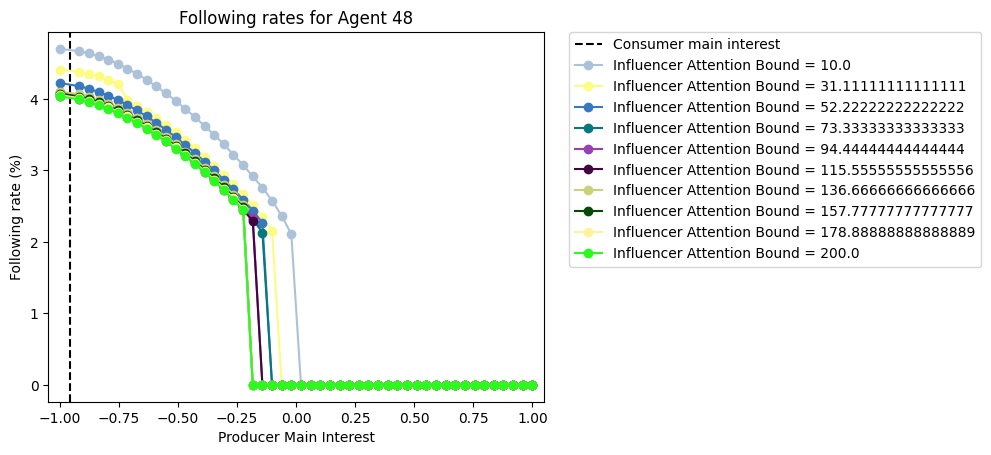

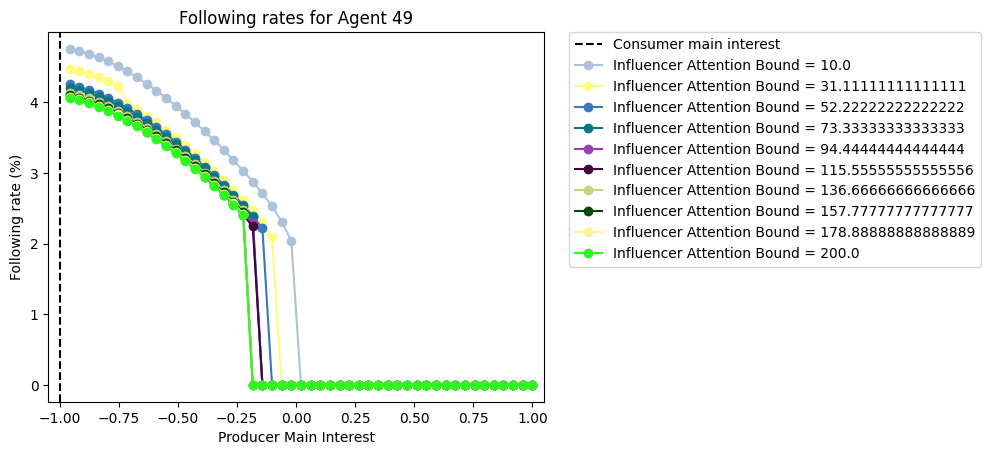

In [ ]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

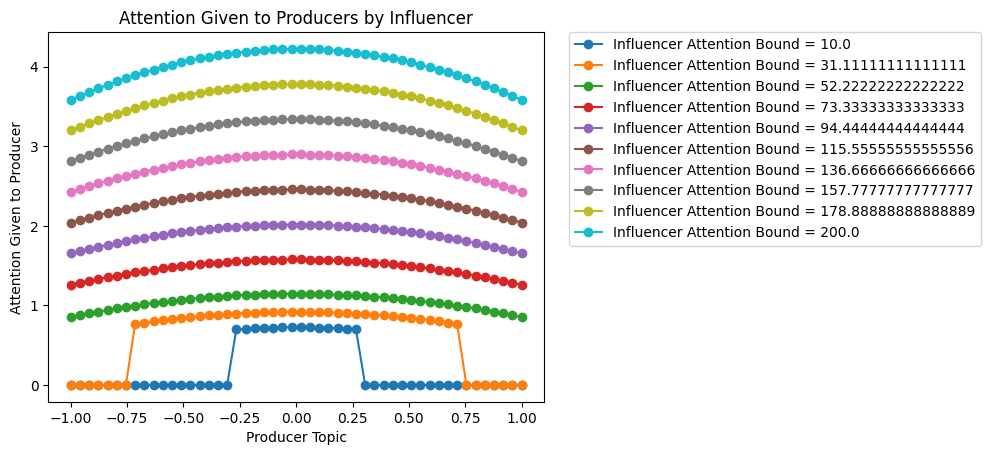

In [ ]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

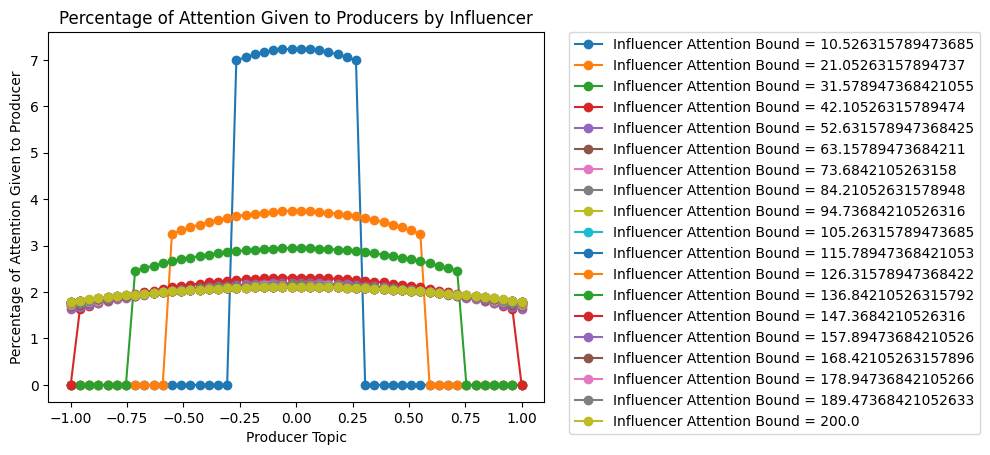

In [ ]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    if influencer.attention_bound == 0:
        continue
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

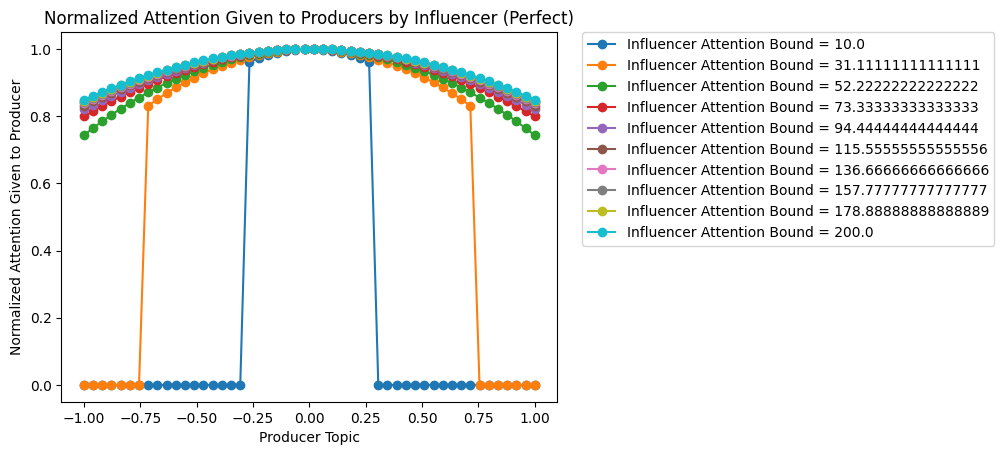

In [ ]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

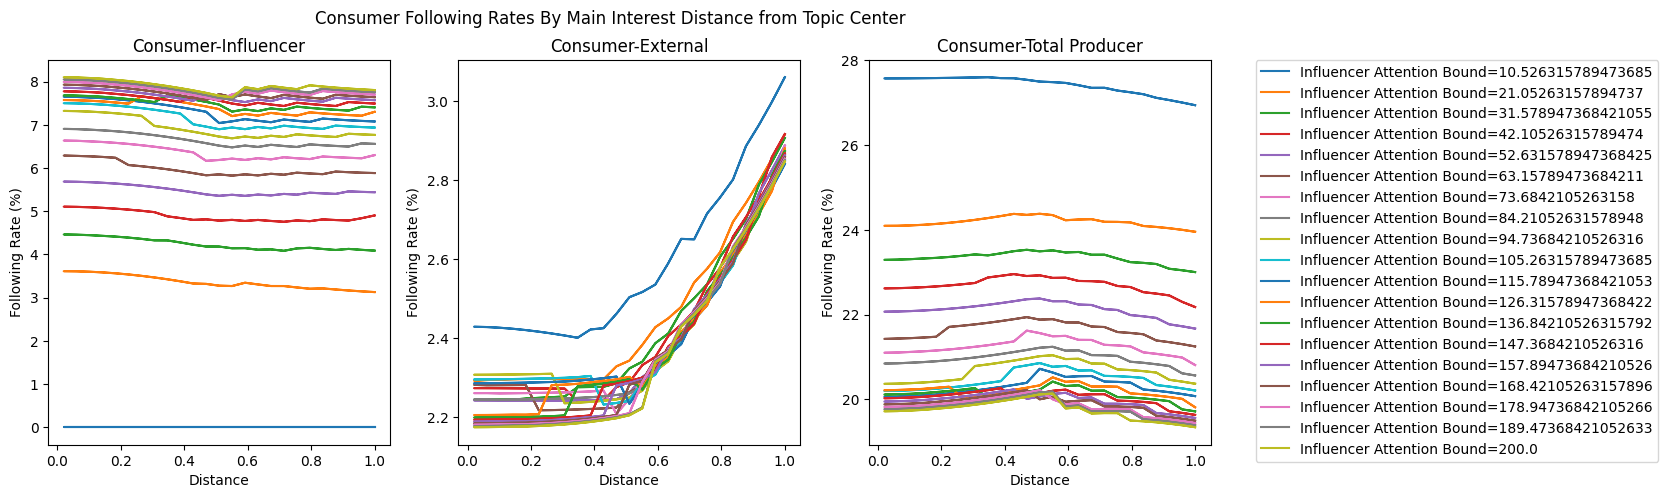

In [ ]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle(f'Consumer Following Rates By Main Interest Distance from Topic Center')

ax1.set_title('Consumer-Influencer')
for i, stat in enumerate(perfect_info_stats):
    if i == 0:
        continue
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    distances = []
    influencer_rates = []
    for consumer in stat.market.consumers:
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        influencer_rates.append(stat.consumer_stats[consumer.index].following_rates[-1][stat.market.influencers[0].index])
    ax1.plot(distances, influencer_rates, label=f'{varied_param_legend_label}={varied_param_values[i]}')
ax1.set_xlabel('Distance')
ax1.set_ylabel('Following Rate (%)')

ax2.set_title('Consumer-External')
for i, stat in enumerate(perfect_info_stats):
    if i == 0:
        continue
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    distances = []
    external_rates = []
    for consumer in stat.market.consumers:
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        external_rates.append(stat.consumer_stats[consumer.index].following_rates[-1][-1])
    ax2.plot(distances, external_rates, label=f'{varied_param_legend_label}={varied_param_values[i]}')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Following Rate (%)')

ax3.set_title('Consumer-Total Producer')
for i, stat in enumerate(perfect_info_stats):
    if i == 0:
        continue
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    distances = []
    total_producer_rates = []
    for consumer in stat.market.consumers:
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        #distance = main_interest[0] - topic_center[0]
        distances.append(distance)
        total_producer_rates.append(sum(stat.consumer_stats[consumer.index].following_rates[-1][:-2]))
    ax3.plot(distances, total_producer_rates, label=f'{varied_param_legend_label}={varied_param_values[i]}')
ax3.set_xlabel('Distance')
ax3.set_ylabel('Following Rate (%)')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.93, 0.88), loc='upper left', borderaxespad=0.)
plt.show()

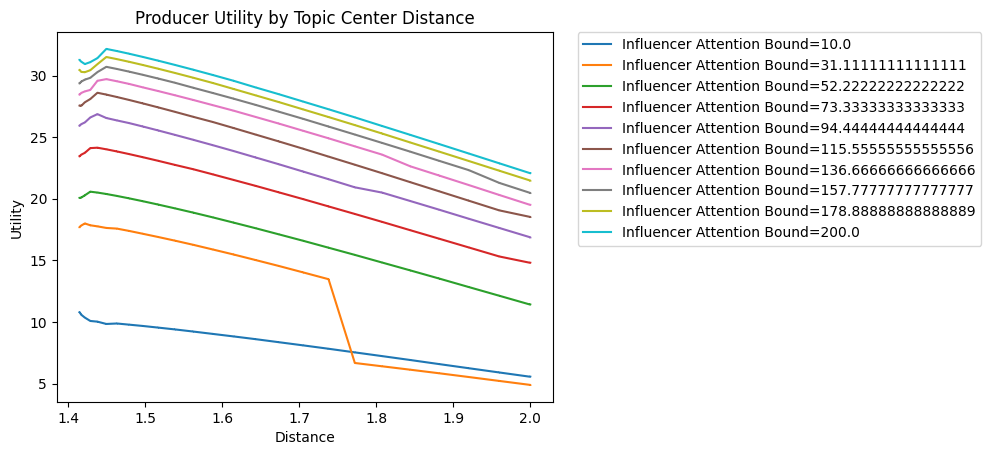

In [ ]:
plt.figure()
plt.title('Producer Utility by Topic Center Distance')

for val, stats in zip(varied_param_values, perfect_info_stats):
    topics_bounds = stats.producer_stats[0].market.topics_bounds
    topic_center = np.mean(topics_bounds, axis=1)
    distances = []
    utilities = []
    for producer_stat in sorted(stats.producer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center)):
        producer = producer_stat.agent
        main_interest = producer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        utilities.append(stats.producer_stats[producer.index].utilities[-1])
    plt.plot(distances, utilities, label=f'{varied_param_legend_label}={val}')
plt.xlabel('Distance')
plt.ylabel('Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()